In [1]:
import pandas as pd
import numpy as np

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [13]:
df = pd.read_csv('processed_file.csv')
pd.set_option('display.max_columns', None)

In [14]:
df

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,final_result,success
0,0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,5.666667,fail
1,1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,5.333333,fail
2,2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,8.333333,fail
3,3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,14.666667,succeed
4,4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,8.666667,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9,9.000000,fail
391,391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16,15.333333,succeed
392,392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7,8.333333,fail
393,393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10,11.000000,succeed


In [15]:
df.shape

(395, 36)

In [28]:
family_columns = ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famsup', 'famrel', 'final_result', 'success']
family_df = df[family_columns]
family_df

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,final_result,success
0,GT3,A,4,4,at_home,teacher,mother,no,4,5.666667,fail
1,GT3,T,1,1,at_home,other,father,yes,5,5.333333,fail
2,LE3,T,1,1,at_home,other,mother,no,4,8.333333,fail
3,GT3,T,4,2,health,services,mother,yes,3,14.666667,succeed
4,GT3,T,3,3,other,other,father,yes,4,8.666667,fail
...,...,...,...,...,...,...,...,...,...,...,...
390,LE3,A,2,2,services,services,other,yes,5,9.000000,fail
391,LE3,T,3,1,services,services,mother,no,2,15.333333,succeed
392,GT3,T,1,1,other,other,other,no,5,8.333333,fail
393,LE3,T,3,2,services,other,mother,no,4,11.000000,succeed


In [29]:
family_df.dtypes

famsize          object
Pstatus          object
Medu              int64
Fedu              int64
Mjob             object
Fjob             object
guardian         object
famsup           object
famrel            int64
final_result    float64
success          object
dtype: object

***********

In [34]:
def bar_plot(column_name, column_description):
    grouped = df.groupby([column_name, 'success']).size().unstack()

    # Plot
    grouped.plot(kind='bar')

    # Add labels and title
    plt.xlabel(column_description)
    plt.ylabel('Count')
    
    plt.title('Distribution of Success by '+ column_description)

    # Show plot
    plt.legend(title='Success')
    plt.show()

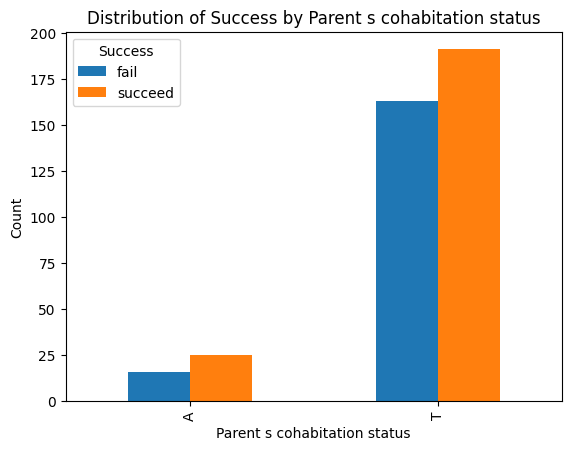

In [37]:
bar_plot('Pstatus', 'Parent s cohabitation status')

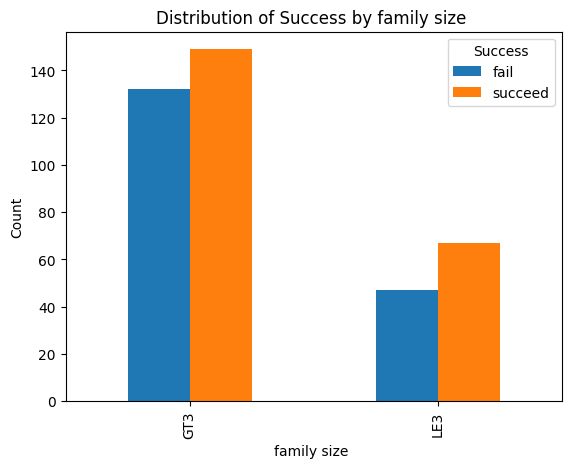

In [42]:
bar_plot('famsize', 'family size ')

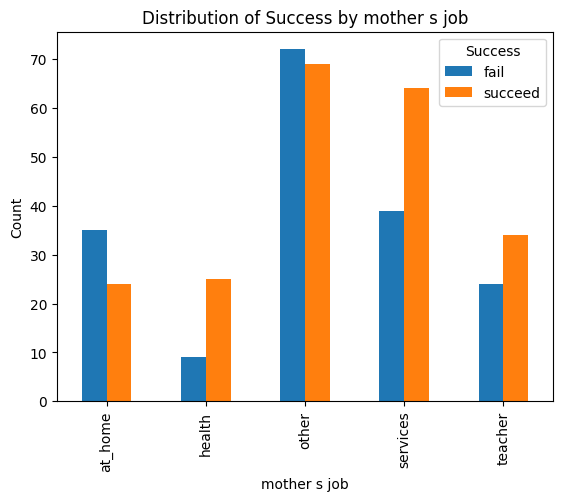

In [43]:
bar_plot('Mjob', 'mother s job')

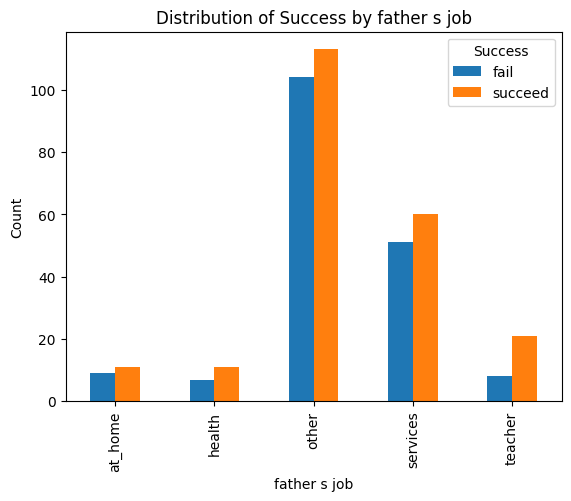

In [44]:
bar_plot('Fjob', 'father s job')

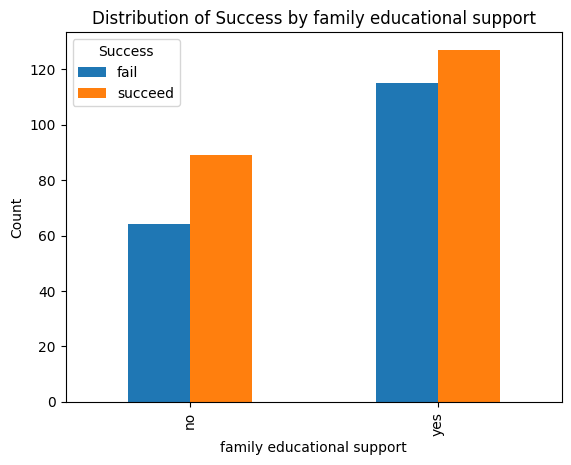

In [45]:
bar_plot('famsup', 'family educational support')

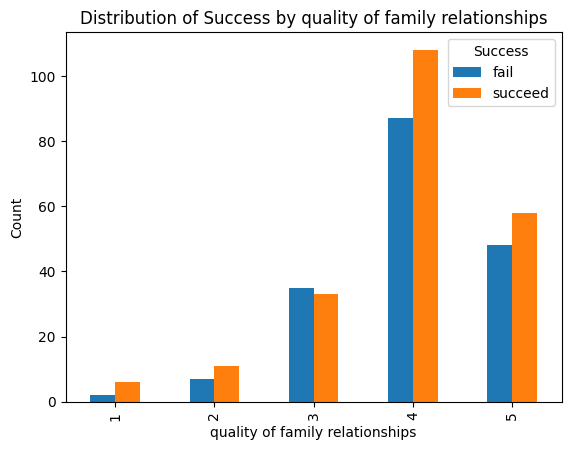

In [46]:
bar_plot('famrel', 'quality of family relationships')

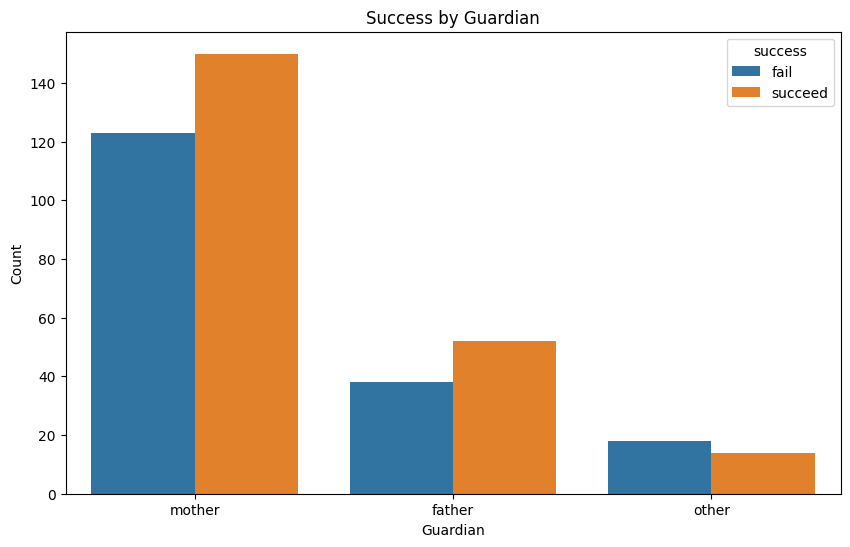

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(x='guardian', hue='success', data=df)
plt.title('Success by Guardian')
plt.xlabel('Guardian')
plt.ylabel('Count')
plt.show()